RESUMEN

La rama de la ciencia que se conoce como la Geofísica utiliza una gran variedad de métodos con la finalidad de hacer inferencias del subsuelo y poder obtener modelos geológicos de interés. Uno de estos métodos es el método inverso.  En general, se define a la teoría de inversión como “un conjunto organizado de técnicas matemáticas que permiten reducir información para obtener conocimiento sobre el mundo físico basándonos en inferencias tomadas de las observaciones”. (Menke, 2012). 

En los problemas de inversión geofísicos se desea determinar  parámetros de alguna estructura, modelo o sistema de interés en el subsuelo a través de datos observados en superficie (anomalías). La detección de minerales, gas, aceite carbón o metales es esencialmente un problema de inversión de datos geofísicos.

A diferencia del problema inverso, en el problema directo (forward model) la estructura o materiales son conocidos y lo que se quiere encontrar son por ejemplo, los campos gravimétricos, magnéticos u electromagnéticos que producen. El problema inverso es más complejo que el directo por razones que se verán más adelante.

Los problemas de inversión y optimización se encuentran fuertemente ligados, ya que si se dispone del problema directo el problema de inversión se puede formular como un problema de optimización.  En general, resolver problemas de inversión geofísica a través de métodos de optimización es un problema de cómputo intensivo . Además la mayoría de los problemas geofísicos son nolineales. Recientemente se han formulado métodos denominados heurísticos que han resultado ser muy útiles en el área de la geofísica como por ejemplo el de Simmulated Annealing (Mauricio Nava Flores, 2018).

En este trabajo es de mi interés comenzar a abordar la inversión de datos geofísicos de origen gravimétrico través del método de optimización conocido como Particle swarm optimization (Kennedy y Eberhart, 1995). Debido a que  invertir datos geofísicos reales constituye en sí un trabajo de tesis, se propone en el proyecto de la Materia de Métodos Numéricos escribir el código en Python para invertir un problema sencillo teórico y con ello verificar la implementación correcta del método. El problema teórico se explica a continuación.



PROBLEMA

El problema teórico a invertir es similar al del artículo de Yuan (2009). Se asumen tres cilindros horizontales enterrados como los de la siguiente figura. Sus radios son R1, R2, R3 de 30, 22.5 y 30 m. Enterrados a las profundidades que se indican en el diagrama 100, 50 y 100 m. Los contrastes de densidad lineal son lambda1, lambda2, lambda 3: 2827.4, 1590.4 y -2827.4. Los datos del problema son en realidad datos sintéticos que se conocen como la anomalía gravimétrica, que en el caso de Yuan(2009) está dada por la curva de la parte superior de la figura. La idea es invertir la anomalía gravimétrica para generar los parámetros de los cilindros.

![](./fotos/problema_teorico.png)

MODELO DE CILINDRO INFINITO

De acuerdo a lo anterior, debemos modelar la atracción gravitatoria producida por un cilindro horizontal infinito, donde se consideran las siguientes simplificaciones (Blakely, 1996):

La fuerza de atracción gravitacional de un cilindro infinitamente largo es inversamente proporcional a la distancia del punto de interés al cilindro.

Se considera que la distancia entre el punto de prueba P y el cilindro solo existe en el plano perpendicular al eje del cilindro

La densidad es constante para todo el volumen del cilindro

Un eje coordenado será paralelo al eje longitudinal del cilindro


Siguiendo el desarrollo descrito en Blakely (1996) la ecuación para obtener la anomalía gravimétrica debida a un cilindro infinito en el punto P(x,y,0) es la siguiente :

$g(P) = {-2\pi\gamma R^2 z} / r $

donde $\gamma$ es una constante, R es el radio del cilindro, z es la distancia y r es la distancia del punto P(x,y,0) al cilindro,

![](./fotos/blakely.png)

MÉTODO DE OPTIMIZACIÓN

Método Particle Swarm Optimization (PSO) 

El método PSO (Kennedy y Eberhart,1995) se basa en el comportamiento de lo que se conoce en la naturaleza como inteligencia de enjambre (swarm intelligence). Es uno de los tantos algoritmos de inteligencia de enjambre que existen en la literatura y que han sido ampliamente utilizados en la Ingeniería por ser fáciles y flexibles. En este tipo de métodos la búsqueda de la mejor solución se asemeja a la búsqueda de alimento por parte de enjambres de abejas o bien de grupos de aves u hormigas. Primero, se genera de forma aleatoria un grupo de individuos que llevan información del modelo inicial con ciertas restricciones o información a priori. Después estos individuos buscan una solución satisfactoria de forma heurística a través de simular comunicación entre los individuos y de la coordinación entre los mismos, lo cual en términos computacionales quiere decir buscar individuos óptimos con datos calculados que concuerden con los datos reales.

Este tipo de problema de optimización pertence a los denominados problemas de Optimización de Derivación libres, lo cual quiere decir que a diferencia de otros métodos de optimización, en estos no se busca aproximar el gradiente de las funciones involucradas. Los métodos de derivación libres no se encuentran desarrollados por completo sino más bien son objeto actual de investigación. 

PSO es un método de tipo no determinísticos o estocástico, es no lineal y se trata de un método global.

El método se explica utilizando la siguiente figura tomada de Yuan (2009). Supóngase un espacio de modelos el cual se puede ilustrar como un cubo con partículas. Las partículas son los modelos sujetos a ciertas restricciones. En la figura los círculos rellenos corresponden a vectores con la posible solución. Los vectores indican la dirección de vuelo de la partícula (dirección de la perturbación de la solución). El círculo vacío indica el vector solución a la verdadera inversión. La distancia de las posibles soluciones a la verdadera solución nos dice qué tan cerca estamos de la solución.






![](./fotos/particulas.png)

La función a optimizar es :

$g(\textbf m)=\lVert{D^{cal} - D^{obs}\rVert}_p + g_{res}(\cdot) \rightarrow min$

donde $\textbf m$ es un vector que contiene los parámetros del modelo geofísico (círculos rellenos), $D^{cal}$ son los datos calculados y $D^{obs}$ los datos geofísicos observados, $g_{res}$ es el término de restricciones

Sean $x_i$ y $v_i$ el vector de posición y velocidad para la partícula $i$. Se puede determinar el vector velocidad para cada tiempo como sigue:

$v_i^{t+1} = \omega v_i^t + \alpha \epsilon_1 [g^* - x_i^t] + \beta\epsilon_2[x_i^{*(t)} - x_i^t]$

Donde $\omega$ es un peso de inercia que se le da a cada partícula para que las velocidades se mantengan en valores aceptables a lo largo de la ejecución, $\epsilon_1$ y $\epsilon_2$ son dos vectores aleatorios que pueden tomar valores entre 0 y 1, los parámetros $\alpha$ y $\beta$ son pesos que indican a cada partícula qué importancia darle a la dirección hacia el óptimo global ($\alpha$) y la dirección hacia el óptimo local ($\beta$), $g^*$ el valor de mejor ajuste global conocido en el instante $t$, $x_i^{(t)}$ es la posición actual de la partícula y $x_i^{(*t)}$ es la mejor posición previamente encontrada por la misma partícula.

Una vez creadas las partículas se considera que la velocidad inicial de las partículas en t=0 es de $v_i = 0$. Las posiciones de las partículas se calculan así:

$x_i^{t+1} = x_i^t + \omega v_i^{t+1}$

Las localidades iniciales de las partículas se deben distribuir relativamente uniformemente tal que puedan muestrar casi todas las regiones. La velocidad inicial de la partícula puede ser cero, esto es $v_i^{t=0}$.  Aunque 

ALGORITMO 

A continuación se muestra un pseudocódigo de PSO:
    
1. Función objetivo $g(x)$, $x=(x_1, ..., x_d)$

2. Inicializar las localidades $x_i$ y velocidades $v_i$ de las $n$ partículas

3. Encontrar $g^*$ a partir de $min\{g(x_1),...,g(x_n)\}$ en $t=0$

4. while (criterio)

     for loop sobre todas las n partículas y todas las $d$ dimensiones
    
     generar velocidad nueva $v_i^{t+1}$ utilizando la ecuación 3
    
     Calcular las nuevas localidades $x_i^{t+1} = x_i + v_i^{t+1}$
    
     Evaluar las funciones objetivo en las nuevas localidades $x_i^{t+1}$
    
     Encontrar el mejor valor actual para cada partícula $x_i^*$
    
     end for
    
     Encontrar el mejor global actual $g^*$
     
     Actualizar $t=t+1$

end while

5. Salida de los resultados finales $x_i^*$ y $g^*$


ACTIVIDADES A REALIZAR:

1. Programar el algorito en python 
2. Probar el algoritmo con una función sencilla antes de probarlo con la anomalía sintética
3. Generar la anomalía sintética de tres cilindros infinitos
4. Aplicar el algoritmo para la anomalía sintética


## AVANCES PUNTO 1 y 2
ALGORITMO EN PYTHON

Probaremos con una función no lineal dada por 
$f(x,y) = - sin(x) \left[sin(\frac{x^2}{\pi}) \right]^{2m} - sin(y)\left[ sin(\frac{2y^2}{\pi})\right]^{2m}$

Graficamos la función:


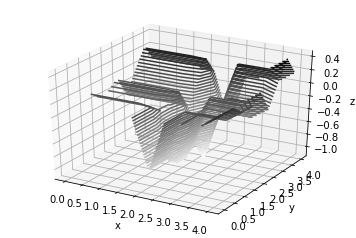

In [7]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d

#graficamos la funcion 
def f(x,y):
    m=10
    return -np.sin(x)*(np.sin(x**2/np.pi))**(2*m) - np.sin(y)*(np.sin(2*y**2/np.pi))**(2*m)


x=np.linspace(0,4,10)
y=np.linspace(0,4,10)
X,Y = np.meshgrid(x,y)
Z = f(X,Y)


fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');



Calculamos el mínimo con una función de la librería "optimize" de python

In [24]:
def fun(x):
    m=10
    return -np.sin(x[0])*(np.sin(x[0]**2/np.pi))**(2*m) - np.sin(x[1])*(np.sin(2*x[1]**2/np.pi))**(2*m)
from scipy import optimize
x0=[2,3]
bounds=([0,4],[0,4])
print(optimize.minimize(fun,x0=[2,1.5]))

      fun: -1.801303410098547
 hess_inv: array([[ 0.03108279, -0.00016878],
       [-0.00016878,  0.01243698]])
      jac: array([-2.08616257e-07,  1.49011612e-07])
  message: 'Optimization terminated successfully.'
     nfev: 44
      nit: 8
     njev: 11
   status: 0
  success: True
        x: array([2.20290551, 1.57079632])


Vemos que el mínimo de la función es $f^*$ = -1.801 y ocurre en las coordenadas (2.2029,1.57079)
A continuación probamos el algoritmo de PSO para este caso:






In [27]:

def ini_pso(n,rango):
    xrango=rango[1]-rango[0]
    yrango=rango[3]-rango[2]
    
    xn=np.random.random(n)*xrango + rango[0]
    yn=np.random.random(n)*yrango + rango[2]
    return [xn,yn]


#mover todas las particulas hacia (xo,yo)
def pso_mover(xn,yn,xo,yo,a,b,rango):
    nn = yn.shape[0]
    #a es alfa y b es beta
    xn = xn *(1-b) + xo*b + a*(np.random.random(nn)-0.5)
    yn = yn *(1-b) + yo*b + a*(np.random.random(nn)-0.5)
    [xn,yn] = encuentra_rango(xn,yn,rango)
    return [xn,yn]
    
def encuentra_rango(xn,yn,rango):
    nn = len(yn)
    nn=1
    for i in np.arange(nn):
        if xn[i] <= rango[0]: xn[i] = rango[0]
        if xn[i] <= rango[1]: xn[i] = rango[1]
        if yn[i] <= rango[2]: yn[i] = rango[2]
        if yn[i] <= rango[3]: yn[i] = rango[3]
    return [xn,yn]



    
def funcion_ejemplo(n,num_it):
    #n= numero de particulas
    #num_it = numero total de iteraciones
    rango = [0, 4, 0, 4] #[xmin xmax ymin ymax]
    beta = 0.5
    best=np.zeros((num_it, 3))
    
    ##### comienza Particle Swarm Optimization #####   
    [xn,yn] = ini_pso(n,rango)
    x=np.linspace(0,4,10)
    y=np.linspace(0,4,10)
    X,Y = np.meshgrid(x,y)
    Z = f(X,Y)
    
    #comienzan iteraciones
    for i in np.arange(num_it):
        plt.contour(X,Y,Z,15)
    #encontrar la mejor locacion (xo,yo)
        zn = f(xn,yn)
        zn_min = zn.min()
        xo = min(xn[zn==zn_min])
        yo = min(yn[zn==zn_min])
        zo = min(zn[zn==zn_min])
        plt.plot(xn,yn,'.',xo,yo,'*')
    #pso acelerado
        gamma = 0.7
        alpha = gamma ** i
    #mover las particulas a nuevas locaciones
        [xn,yn] = pso_mover(xn,yn,xo,yo,alpha,beta,rango)
        plt.show()
        best[i,0]=xo
        best[i,1]=yo
        best[i,2]=zo
        
    
    
    return best




Corremos ahora el algoritmo usado 20 partículas y 10 interaciones:

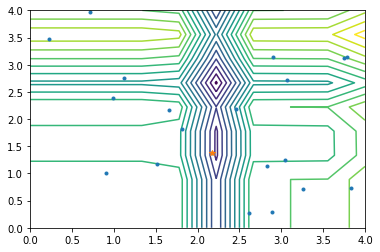

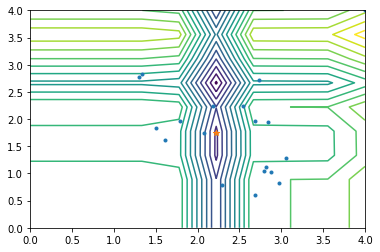

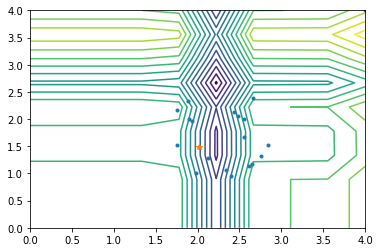

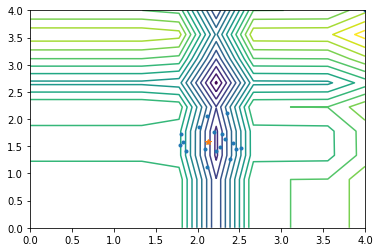

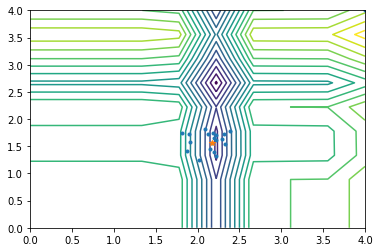

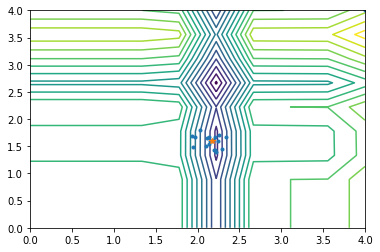

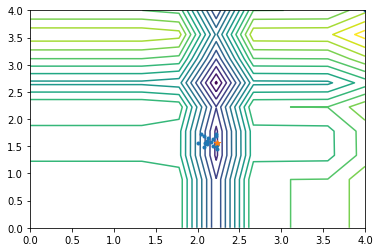

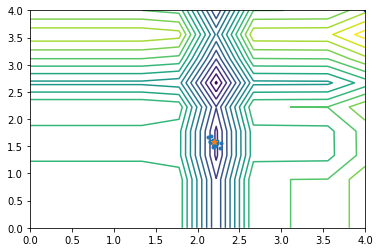

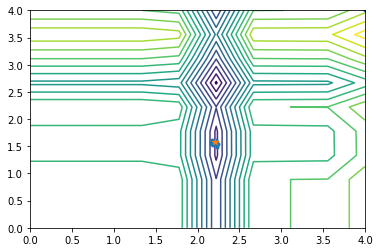

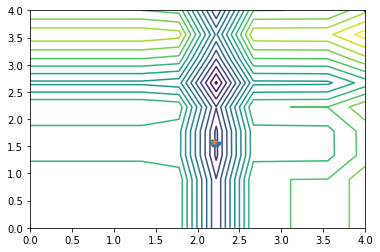

In [30]:
best=funcion_ejemplo(20,10)


In [183]:

best


array([[ 2.4728428 ,  1.39955121, -0.48492078],
       [ 1.74858217,  1.58292304, -1.01590502],
       [ 1.81743926,  1.55227984, -1.04368035],
       [ 2.11984742,  1.64787195, -1.47609192],
       [ 2.32625795,  1.58535017, -1.56912287],
       [ 2.25182531,  1.56261398, -1.75982033],
       [ 2.21979921,  1.55684766, -1.7888624 ],
       [ 2.18516269,  1.58197804, -1.79115502],
       [ 2.1978652 ,  1.56559677, -1.79980074],
       [ 2.20805587,  1.56450113, -1.79927402]])

Vemos que PSO convergió al mínimo esperado! 

PIE DE FIGURAS
Figura 2. Modelo simplificado del PSO. Tomado de Yuan, 2009.

BIBLIOGRAFIA

https://es.wikipedia.org/wiki/Optimización_por_enjambre_de_part%C3%ADculas
    
Jorge Nocedal, Stephen J. Wright. Numerical Optimization. Second Edition. Springer Series in Operations Research.Springer

Karl F. Warnick. Numerical Methods For Engineering. An introduction Using MATLAB and Computational Electromagnetics Examples.

Menke W., 2012. Geophysical Data Analysis: discrete inverse theory: MATLAB edition, volumen 45. Academic press.


Yuan Sanyi, Wang Shangxi y Tian Nan. 2009. Applied Geophysics Vol. 6, No.2 Swarm intelligence optimization and its application in geophysical data inversion.

Eberhart, R. y Kennedy, J. 1995. A new optimizer using particle swarm theory. En Micro Machine and Human Science. MHS' 95., Proceedings of the Sixth International Sympsium on, pp. 39-43. IEEE.

Blakely, R. J. 1996. Potential Theory in gravity and magnetic applications. Cambridge University Press.



array([0])